In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-salary/HR_DT.csv


# **Problem Statement**
**In the recruitment domain, HR faces the challenge of predicting if the candidate is faking their salary or not. For example, a candidate claims to have 5 years of experience and earns 70,000 per month working as a regional manager. The candidate expects more money than his previous CTC. We need a way to verify their claims (is 70,000 a month working as a regional manager with an experience of 5 years a genuine claim or does he/she make less than that**

In [2]:
#importing library
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
hr = pd.read_csv("../input/hr-salary/HR_DT.csv")

In [4]:
hr.head()

,Position of the employee,no of Years of Experience of employee,monthly income of employee
0,Business Analyst,1.1,39343
1,Junior Consultant,1.3,46205
2,Senior Consultant,1.5,37731
3,Manager,2.0,43525
4,Country Manager,2.2,39891


In [5]:
hr.describe()

,no of Years of Experience of employee,monthly income of employee
count,196.000000,196.000000
mean,5.112245,74194.923469
std,2.783993,26731.578387
min,1.000000,37731.000000
25%,3.000000,56430.000000
50%,4.100000,63831.500000
75%,7.100000,98273.000000
max,10.500000,122391.000000


In [6]:
hr.shape

(196, 3)

In [7]:
hr.isna().sum()

Position of the employee                 0
no of Years of Experience of employee    0
 monthly income of employee              0
dtype: int64

In [8]:
hr.columns

Index(['Position of the employee', 'no of Years of Experience of employee',
       ' monthly income of employee'],
      dtype='object')

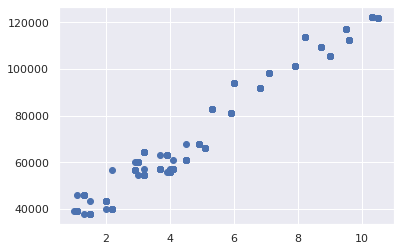

In [9]:
plt.scatter(x='no of Years of Experience of employee',y=' monthly income of employee',data=hr)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4aa64c1050>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4aa64c1690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4aa64b5d10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4aa64c1d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4aa64d10d0>],
 'means': []}

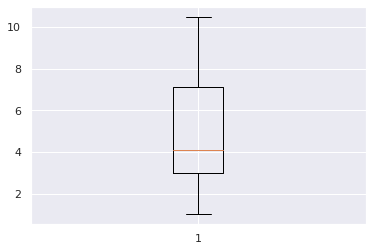

In [10]:
plt.boxplot(x='no of Years of Experience of employee',data= hr)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4aa643e750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4aa643ec90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4aa643e490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4aa6448410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4aa6448750>],
 'means': []}

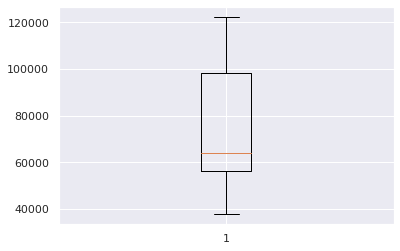

In [11]:
plt.boxplot(x=' monthly income of employee',data= hr)

In [12]:
# n-1 dummy variables will be created for n categories

lb = LabelEncoder()
 
hr['Position of the employee'] = lb.fit_transform(hr['Position of the employee'])


In [13]:
# Input and Output Split
predictors = hr.iloc[:, :2]
type(predictors)

target = hr.iloc[:,2:]
type(target)


pandas.core.frame.DataFrame

In [14]:
# Train Test partition of the data

x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state=0)


In [15]:
# Train the Regression DT
regtree = tree.DecisionTreeRegressor(max_depth = 3)
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [16]:
# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

In [17]:
test_pred


array([111479.82608696,  58752.83018868,  42202.64      , 111479.82608696,
        96580.88888889,  65754.        ,  58752.83018868,  42202.64      ,
        65754.        ,  82303.90909091,  58752.83018868,  58752.83018868,
        58752.83018868,  58752.83018868,  96580.88888889,  42202.64      ,
        42202.64      ,  42202.64      ,  65754.        ,  96580.88888889,
       111479.82608696, 111479.82608696,  65754.        , 122131.5       ,
        38134.        , 111479.82608696,  96580.88888889,  65754.        ,
       111479.82608696,  65754.        ,  96580.88888889,  58752.83018868,
        58752.83018868,  58752.83018868,  42202.64      ,  96580.88888889,
       122131.5       ,  65754.        ,  58752.83018868, 111479.82608696])

In [18]:
train_pred

array([ 96580.88888889, 111479.82608696,  58752.83018868,  58752.83018868,
        42202.64      ,  58752.83018868,  38134.        ,  58752.83018868,
       122131.5       ,  38134.        ,  42202.64      , 111479.82608696,
        42202.64      ,  96580.88888889,  58752.83018868,  82303.90909091,
        42202.64      ,  42202.64      ,  96580.88888889, 122131.5       ,
        42202.64      , 111479.82608696,  58752.83018868,  65754.        ,
        96580.88888889, 111479.82608696,  65754.        ,  82303.90909091,
       111479.82608696,  58752.83018868,  42202.64      , 111479.82608696,
        58752.83018868,  65754.        , 111479.82608696,  58752.83018868,
        58752.83018868,  65754.        ,  58752.83018868,  58752.83018868,
        42202.64      ,  42202.64      , 122131.5       ,  96580.88888889,
        96580.88888889,  58752.83018868,  58752.83018868,  58752.83018868,
        58752.83018868,  58752.83018868, 122131.5       , 111479.82608696,
        58752.83018868,  

In [19]:
# Measuring accuracy
# Error on test dataset
mean_squared_error(y_test, test_pred)
r2_score(y_test, test_pred)


0.9836019909461067

In [20]:
# Error on train dataset
mean_squared_error(y_train, train_pred)
r2_score(y_train, train_pred)


0.9847873730685655

In [21]:
pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 994.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=6032b86e7eac0614215b9d46eecbe3431bd074eadbf7a024389af288c2a89c38
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


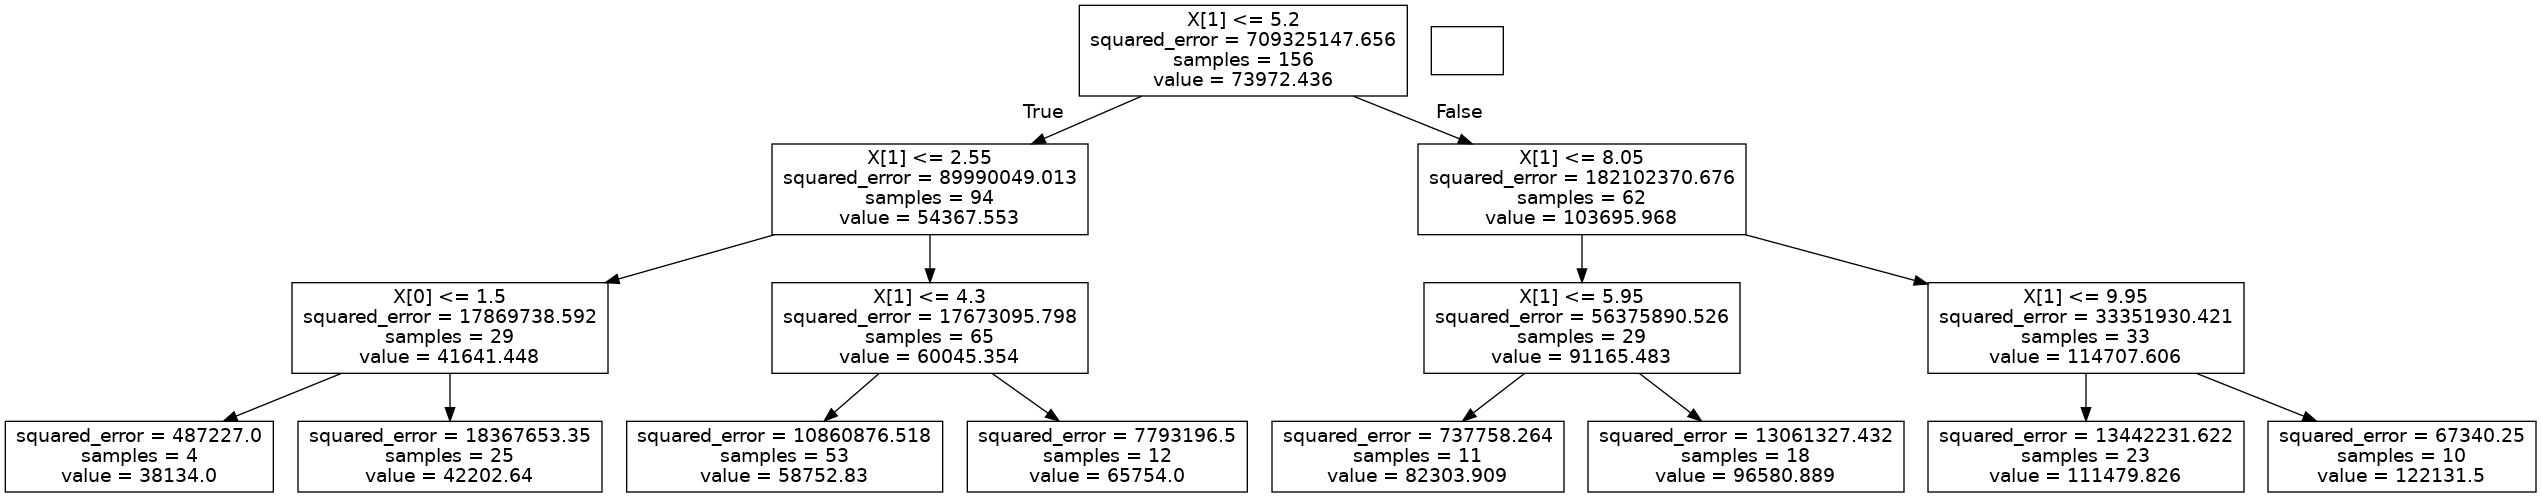

In [22]:
# Plot the DT
dot_data = tree.export_graphviz(regtree, out_file=None)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())



In [23]:
# Pruning the Tree
# Minimum observations at the internal node approach
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 3)
regtree2.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=3)

In [24]:
# Prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

In [25]:
# Error on test dataset
mean_squared_error(y_test, test_pred2)
r2_score(y_test, test_pred2)


0.9865281921867806

In [26]:
# Error on train dataset
mean_squared_error(y_train, train_pred2)
r2_score(y_train, train_pred2)


0.9981285722833325

In [27]:
###########
## Minimum observations at the leaf node approach
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 3)
regtree3.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_leaf=3)

In [28]:
# Prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

In [29]:
# measure of error on test dataset
mean_squared_error(y_test, test_pred3)
r2_score(y_test, test_pred3)

0.9914232377038641

In [30]:
# measure of error on train dataset
mean_squared_error(y_train, train_pred3)
r2_score(y_train, train_pred3)

0.9948941589359922